In [1]:
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel("Heart Disease.xlsx")
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


# Data Analysis

In [3]:
df.shape

(319795, 18)

In [4]:
df.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
df.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth        int64
MentalHealth          int64
DiffWalking          object
Sex                  object
AgeCategory          object
Race                 object
Diabetic             object
PhysicalActivity     object
GenHealth            object
SleepTime             int64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [6]:
df.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  int64  
 6   MentalHealth      319795 non-null  int64  
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  int64  
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [8]:
df.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [9]:
df.corr(numeric_only = True)

,BMI,PhysicalHealth,MentalHealth,SleepTime
BMI,1.000000,0.109788,0.064131,-0.051822
PhysicalHealth,0.109788,1.000000,0.287987,-0.061387
MentalHealth,0.064131,0.287987,1.000000,-0.119717
SleepTime,-0.051822,-0.061387,-0.119717,1.000000


In [10]:
df.nunique()

HeartDisease           2
BMI                 3604
Smoking                2
AlcoholDrinking        2
Stroke                 2
PhysicalHealth        31
MentalHealth          31
DiffWalking            2
Sex                    2
AgeCategory           13
Race                   6
Diabetic               4
PhysicalActivity       2
GenHealth              5
SleepTime             24
Asthma                 2
KidneyDisease          2
SkinCancer             2
dtype: int64

In [11]:
df1= df.copy()
df2= df.copy()

In [12]:
df.duplicated().sum()

18078

In [13]:
df.drop_duplicates(inplace = True)
df.shape

(301717, 18)

# Scalling

In [14]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [15]:
mn = MinMaxScaler(feature_range=(0,1))

In [16]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
1,No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
2,No,26.58,Yes,No,No,20,30,No,Male,65-69,White,Yes,Yes,Fair,8,Yes,No,No
3,No,24.21,No,No,No,0,0,No,Female,75-79,White,No,No,Good,6,No,No,Yes
4,No,23.71,No,No,No,28,0,Yes,Female,40-44,White,No,Yes,Very good,8,No,No,No


In [17]:
df['BMI'] = mn.fit_transform(df[['BMI']])
df['PhysicalHealth'] = mn.fit_transform(df[['PhysicalHealth']])
df['MentalHealth'] = mn.fit_transform(df[['MentalHealth']])
df['SleepTime'] = mn.fit_transform(df[['SleepTime']])

In [18]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,0.055294,Yes,No,No,0.100000,1.0,No,Female,55-59,White,Yes,Yes,Very good,0.173913,Yes,No,Yes
1,No,0.100447,No,No,Yes,0.000000,0.0,No,Female,80 or older,White,No,Yes,Very good,0.260870,No,No,No
2,No,0.175782,Yes,No,No,0.666667,1.0,No,Male,65-69,White,Yes,Yes,Fair,0.304348,Yes,No,No
3,No,0.147169,No,No,No,0.000000,0.0,No,Female,75-79,White,No,No,Good,0.217391,No,No,Yes
4,No,0.141132,No,No,No,0.933333,0.0,Yes,Female,40-44,White,No,Yes,Very good,0.304348,No,No,No


# Visualization

In [19]:
import seaborn as sns

<Axes: xlabel='BMI', ylabel='Count'>

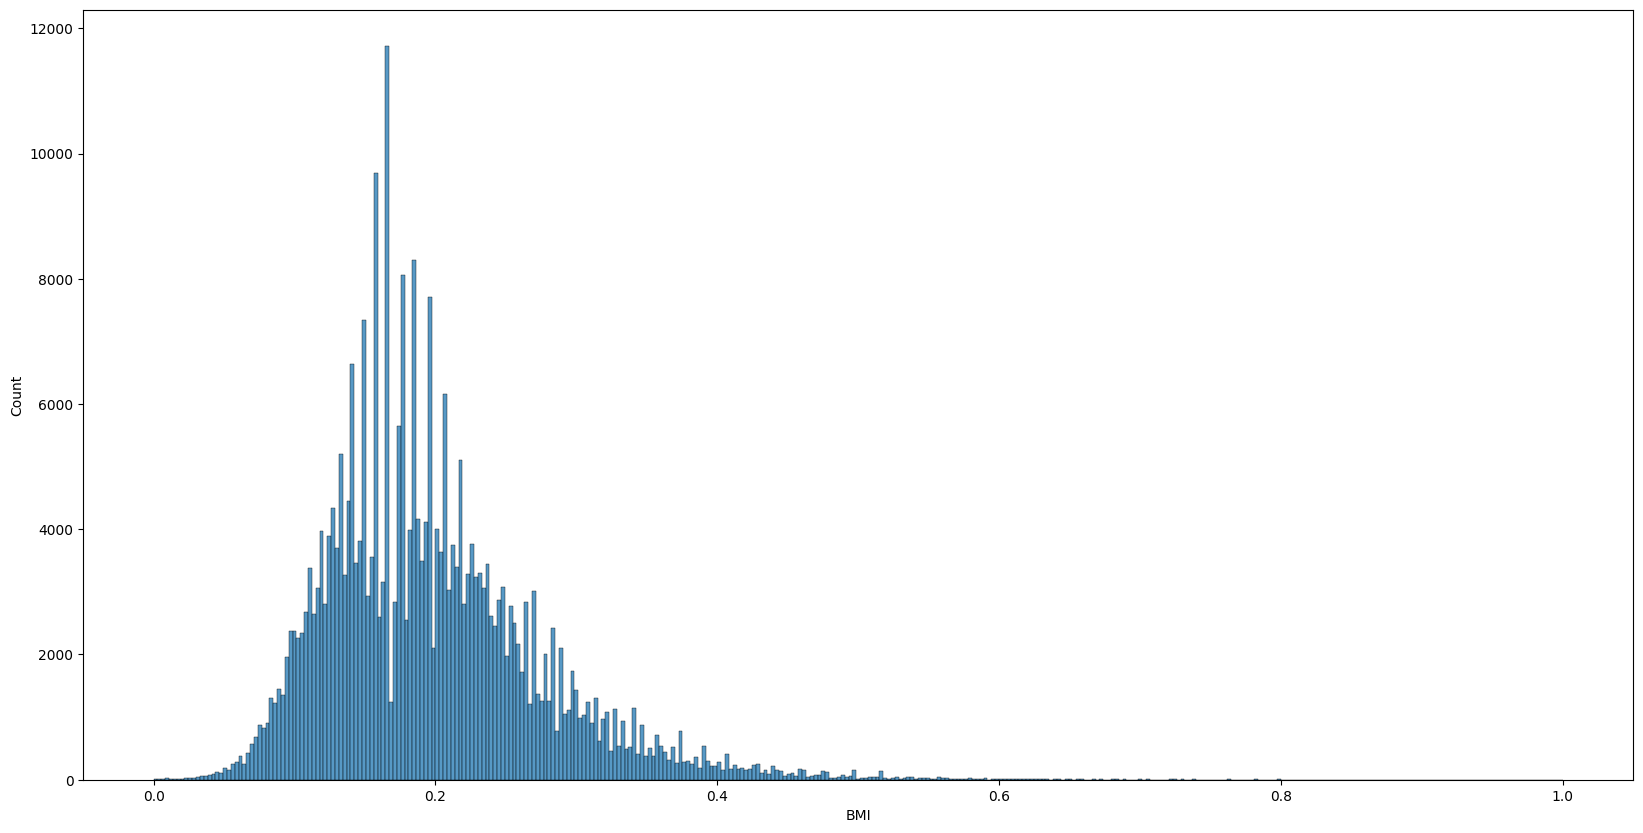

In [20]:
plt.figure(figsize = (20, 10))
sns.histplot(df['BMI'])

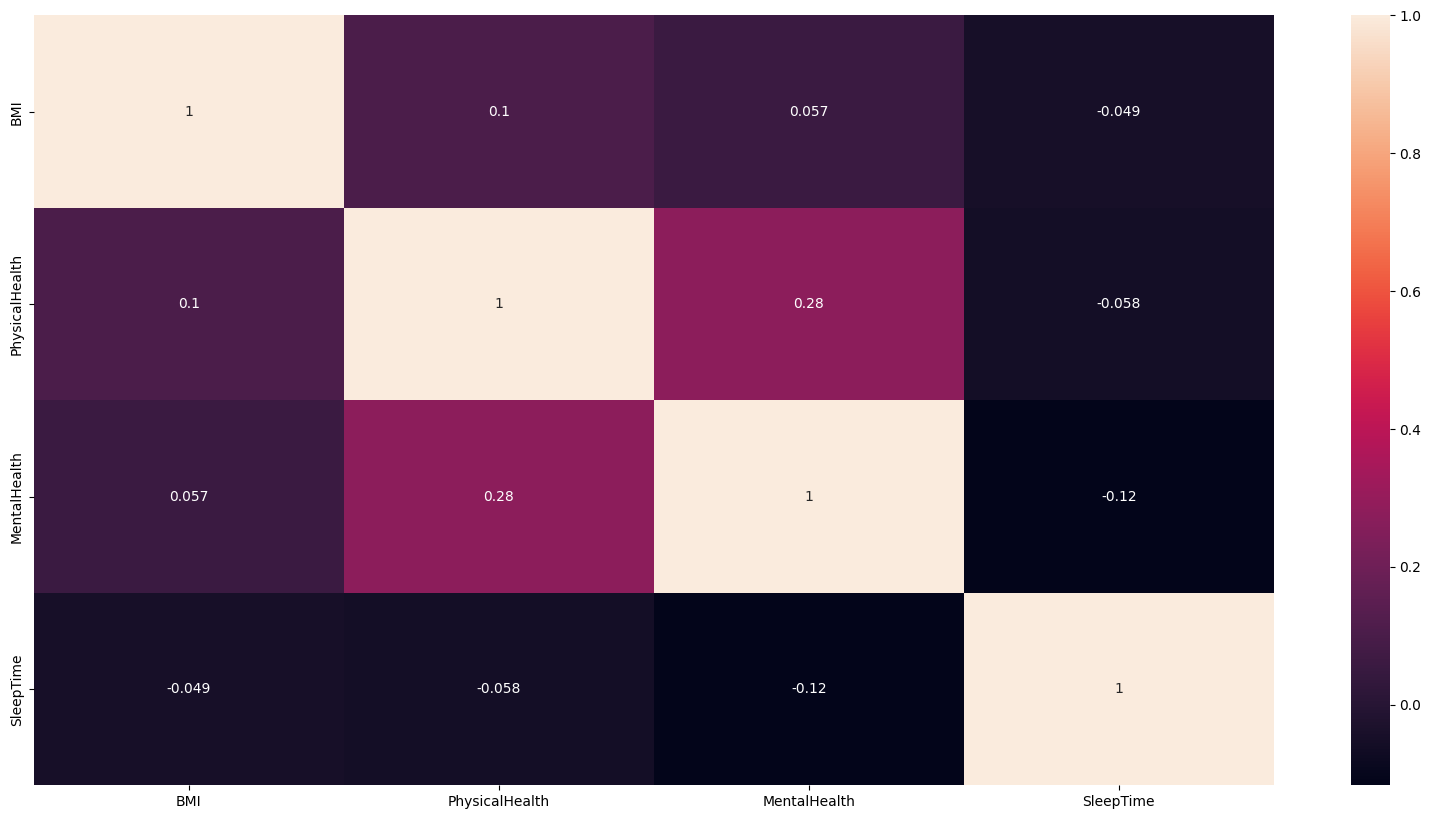

In [23]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(numeric_only = True), annot= True)
plt.show()

# Encoding

In [30]:
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype

In [31]:
le = LabelEncoder()

In [32]:
for col in df.columns:
    if is_numeric_dtype(df[col]):
        continue
    else:
        df[col] = le.fit_transform(df[col])
        
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,0.055294,1,0,0,0.100000,1.0,0,0,7,5,2,1,4,0.173913,1,0,1
1,0,0.100447,0,0,1,0.000000,0.0,0,0,12,5,0,1,4,0.260870,0,0,0
2,0,0.175782,1,0,0,0.666667,1.0,0,1,9,5,2,1,1,0.304348,1,0,0
3,0,0.147169,0,0,0,0.000000,0.0,0,0,11,5,0,0,2,0.217391,0,0,1
4,0,0.141132,0,0,0,0.933333,0.0,1,0,4,5,0,1,4,0.304348,0,0,0


# Separeting x,y

In [33]:
x = df.drop(columns=['HeartDisease'], axis=1)
y = df['HeartDisease']

In [35]:
y.value_counts() # soman na

HeartDisease
0    274456
1     27261
Name: count, dtype: int64

In [39]:
!pip install -U imbalanced-learn

                                              0.0/235.6 kB ? eta -:--:--
     ------                                  41.0/235.6 kB 1.9 MB/s eta 0:00:01
     -----------------------                143.4/235.6 kB 2.1 MB/s eta 0:00:01
     -------------------------------------- 235.6/235.6 kB 1.8 MB/s eta 0:00:00


In [40]:
from imblearn.over_sampling import RandomOverSampler

In [43]:
os = RandomOverSampler(random_state = 44)

In [44]:
x1, y1 = os.fit_resample(x, y)

In [45]:
y1.value_counts()

HeartDisease
0    274456
1    274456
Name: count, dtype: int64

# Train Test Split

In [46]:
xtrain, xtest, ytrain, ytest = tts(x1, y1, test_size = 0.3, random_state = 42)

# Logistic Regression

In [47]:
log = LogisticRegression()

In [48]:
log.fit(xtrain, ytrain)

LogisticRegression()

In [49]:
log_pred = log.predict(xtest)
log_pred

array([1, 0, 0, ..., 1, 1, 0])

In [52]:
log_score = log.score(xtest,ytest)
log_score

0.7482541263344548

# Decision tree 

In [53]:
dt = DecisionTreeClassifier()
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [55]:
dt_pred = dt.predict(xtest)
dt_pred

array([1, 1, 0, ..., 1, 1, 0])

In [56]:
dt_score = dt.score(xtest,ytest)
dt_score

0.9479699284647243

# KNN

In [58]:
knn = KNeighborsClassifier()
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [59]:
knn_pred = knn.predict(xtest)
knn_pred

array([1, 1, 0, ..., 1, 1, 0])

In [60]:
knn_score = knn.score(xtest,ytest)
knn_score

0.882974847274008

# Random Forest

In [61]:
rf = RandomForestClassifier()
rf.fit(xtrain, ytrain)

RandomForestClassifier()

In [62]:
rf_pred = rf.predict(xtest)
rf_pred

array([1, 1, 0, ..., 1, 1, 0])

In [63]:
rf_score = rf.score(xtest,ytest)
rf_score

0.9642748703499034

In [66]:
compare_score = pd.DataFrame({'Model': ['Logistic Regression', 'Dession Tree', 'KNN', 'Random Forest'], 'Accuracy': [log_score,dt_score,knn_score,rf_score]}) 

In [67]:
compare_score

,Model,Accuracy
0,Logistic Regression,0.748254
1,Dession Tree,0.947970
2,KNN,0.882975
3,Random Forest,0.964275


In [73]:
data = pd.DataFrame({
    'Name':['Prediction', 'Accuracy'],
    'Logistic': [log_pred,log_score],
    'DT': [dt_pred,dt_score],
    'KNN':[knn_pred,knn_score],
    'Random forest': [rf_pred,rf_score]})
data.head()

,Name,Logistic,DT,KNN,Random forest
0,Prediction,"[1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, ...","[1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, ...","[1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, ...","[1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, ..."
1,Accuracy,0.748254,0.94797,0.882975,0.964275


In [83]:
data1 = pd.DataFrame({
    'Name':['Accuracy'],
    'Logistic': [log_score],
    'DT': [dt_score],
    'KNN':[knn_score],
    'Random forest': [rf_score]})
data1.head()

,Name,Logistic,DT,KNN,Random forest
0,Accuracy,0.748254,0.94797,0.882975,0.964275


<Axes: xlabel='Name'>

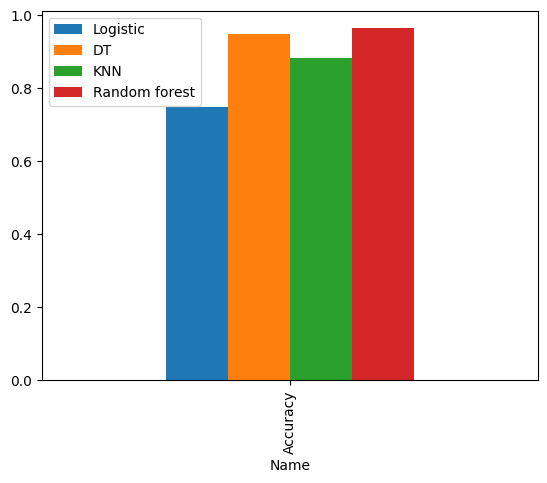

In [84]:
data1.plot(x="Name", y=["Logistic", "DT","KNN","Random forest"], kind="bar")

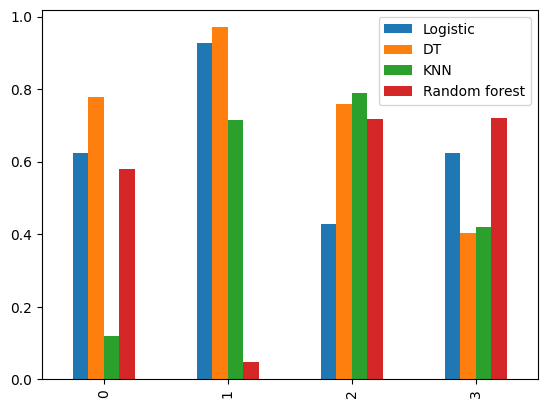

In [85]:
df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['Logistic','DT','KNN',"Random forest"])

df.plot(kind='bar')
plt.show()

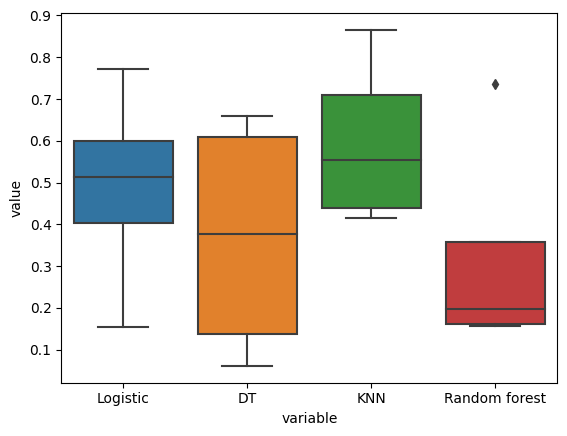

In [86]:
df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['Logistic','DT','KNN','Random forest'])

sns.boxplot(x="variable", y="value", data=pd.melt(df))

plt.show()